In [4]:
# Підключення до бібліотек
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from google.colab import drive

# URL сторінки Вікіпедії
source = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C'

# Завантаження таблиці
df = pd.read_html(source, match='Коефіцієнт народжуваності в регіонах України', thousands=".", decimal=",")[0]

# Виведення перших рядків таблиці
print(df.head())

             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —


In [5]:
# Кількість рядків та стовпців у датафреймі
print(df.shape)

(28, 9)


In [6]:
# Заміна значень "—" на NaN
df = df.replace('—', pd.NA)

In [7]:
# Типи всіх стовпців
print(df.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object


In [8]:
# Заміна типів нечислових колонок на числові
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [9]:
# Частка пропусків у кожній колонці
print(df.isnull().sum() / len(df))

Регіон    1.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64


In [10]:
# Видалення останнього рядка (дані по всій країні)
df = df.drop(df.index[-1])

In [11]:
# Заміна пропусків середніми значеннями стовпців
df = df.fillna(df.mean())

In [12]:
# Регіони з вищою народжуваністю в 2019 році
average_2019 = df[df.columns[-1]].mean()
regions_above_average_2019 = df[df.columns[-1]] > average_2019
print("Регіони з вищою народжуваністю у 2019 році:", df[regions_above_average_2019]['Регіон'])

Регіони з вищою народжуваністю у 2019 році: 2    NaN
6    NaN
8    NaN
12   NaN
14   NaN
16   NaN
20   NaN
23   NaN
25   NaN
Name: Регіон, dtype: float64


In [13]:
# Регіон з найвищою народжуваністю в 2014 році
max_birth_rate_2014 = df[df[df.columns[-6]] == df[df.columns[-6]].max()]['Регіон']
print(max_birth_rate_2014)

6   NaN
Name: Регіон, dtype: float64


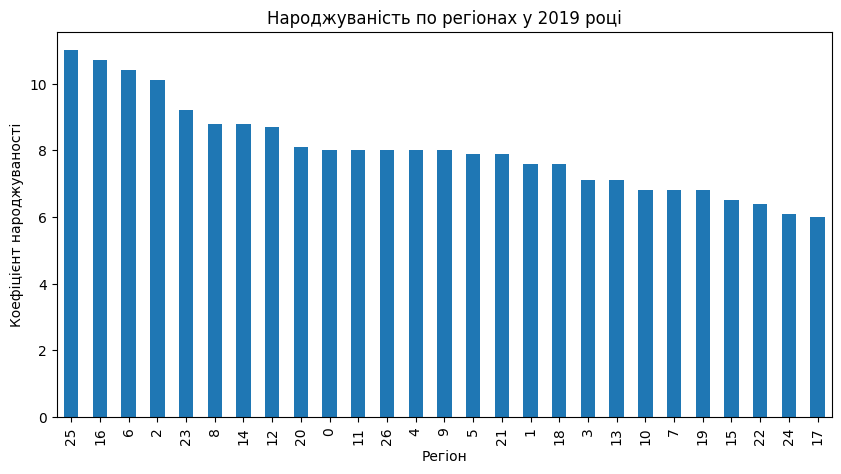

In [14]:
# Стовпчикова діаграма народжуваності по регіонам у 2019 році
plt.figure(figsize=(10, 5))
df.sort_values(by=df.columns[-1], ascending=False)[df.columns[-1]].plot(kind='bar')
plt.title('Народжуваність по регіонах у 2019 році')
plt.ylabel('Коефіцієнт народжуваності')
plt.xlabel('Регіон')
plt.show()

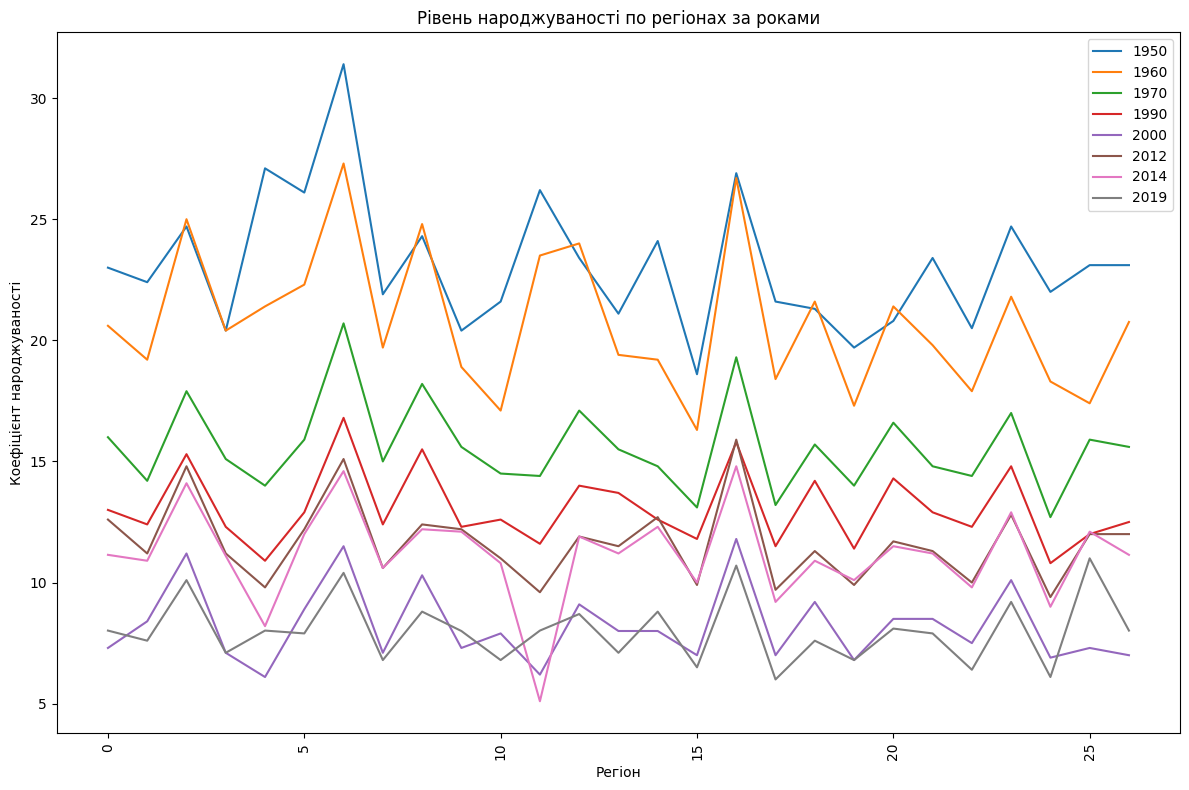

In [27]:
# Побудова графіка розподілу рівня народжуваності по регіонах за роками
plt.figure(figsize=(12, 8))
for i in range(1, len(df.columns)):
    plt.plot(df.index, df[df.columns[i]], label=df.columns[i])
plt.title('Рівень народжуваності по регіонах за роками')
plt.xlabel('Регіон')
plt.ylabel('Коефіцієнт народжуваності')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

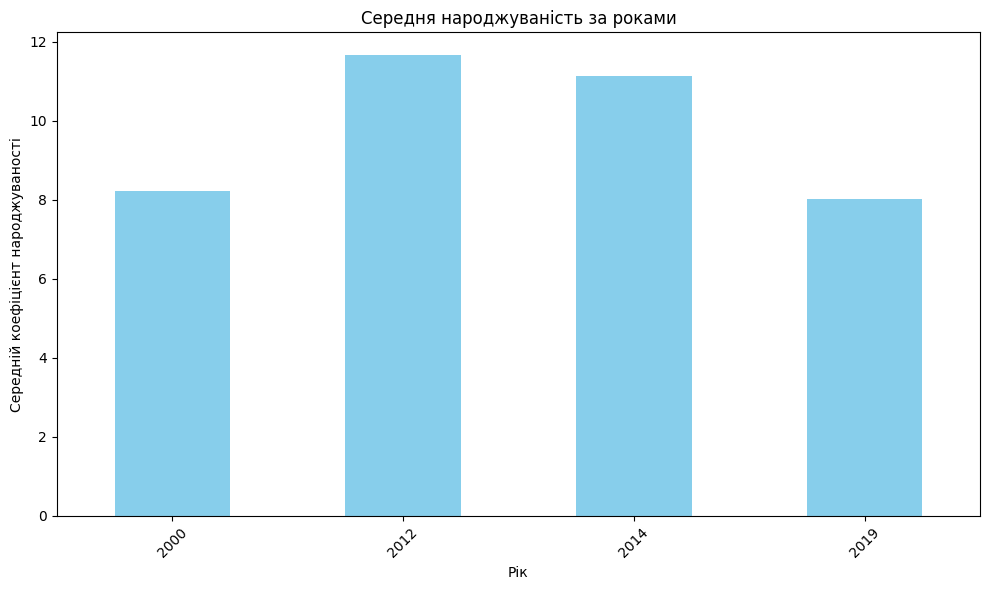

In [20]:
# Побудова графіка розподілу середньої народжуваності за роками
plt.figure(figsize=(10, 6))
df.mean().iloc[5:].plot(kind='bar', color='skyblue')
plt.title('Середня народжуваність за роками')
plt.xlabel('Рік')
plt.ylabel('Середній коефіцієнт народжуваності')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

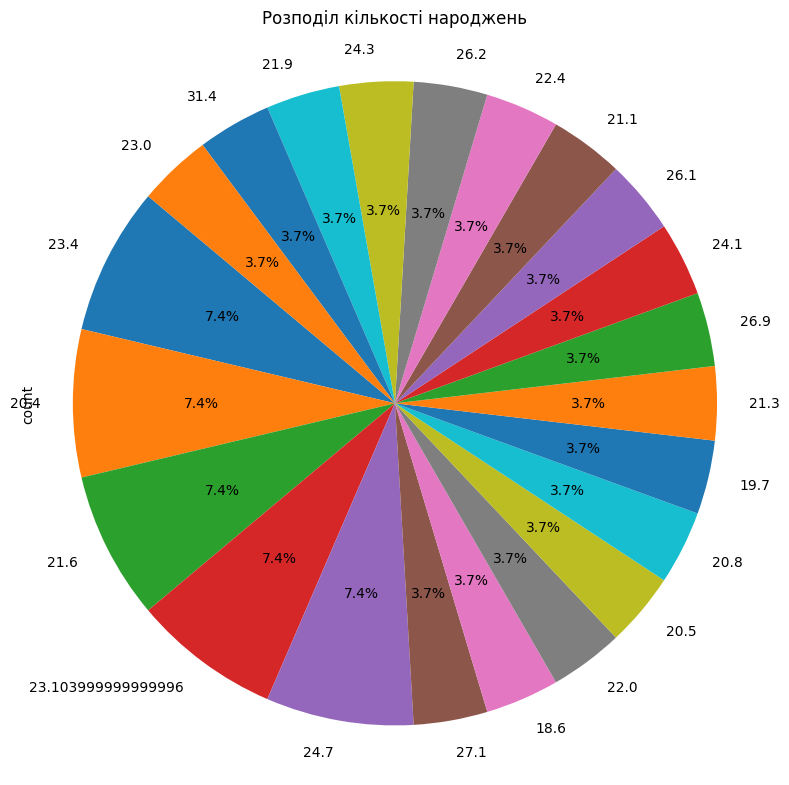

In [29]:
# Побудова кругової діаграми для показника "Народження"
plt.figure(figsize=(8, 8))
birth_rate_fraction = df['1950'].value_counts()
birth_rate_fraction.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Розподіл кількості народжень')
plt.axis('equal')
plt.tight_layout()
plt.show()